**Data preprocessing is a critical step in data science tasks, ensuring that raw data is transformed into a clean, organized, and structured format suitable for analysis. A data preprocessing pipeline streamlines this complex process by automating a series of steps, enabling data professionals to efficiently and consistently preprocess diverse datasets.**

# **Data Understanding and Preprocessing**

### ***Data Cleaning***

In [1]:
"""
Loan Prediction Data Analysis

This script imports necessary libraries for data manipulation and analysis,
loads a loan prediction dataset from a CSV file, and prints the contents of the dataset.

Libraries Used:
- pandas: For data manipulation and analysis.
- numpy: For numerical operations (if needed in future analysis).

Usage:
- Ensure that the CSV file path is correct.
- Run the script to load and inspect the dataset.
"""

# Importing necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/loan_prediction/loan_prediction.csv")

# Display the dataset
print(data)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [2]:
# Display summary information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [3]:
# Generate descriptive statistics for numerical columns in the dataset

data.describe([0.1, 0.25, 0.50, 0.75, 0.95, 1.00]).T

,count,mean,std,min,10%,25%,50%,75%,95%,100%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2216.1,2877.5,3812.5,5795.00,14583.0,81000.0,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,0.0,1188.5,2297.25,4997.4,41667.0,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,71.0,100.0,128.0,168.00,297.8,700.0,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,294.0,360.0,360.0,360.00,360.0,480.0,480.0
Credit_History,564.0,0.842199,0.364878,0.0,0.0,1.0,1.0,1.00,1.0,1.0,1.0


In [4]:
# Print the number of missing values (NaNs) in each column of the dataset

print(data.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
# Drop the specified columns from the DataFrame

data = data.drop(columns=["Dependents", "Loan_ID"])

In [6]:
# Fill missing values in categorical columns with the mode
for column in ['Gender', 'Married','Self_Employed', 'Credit_History']:
   data[column].fillna(data[column].mode()[0], inplace=True)

# Fill missing values in LoanAmount and Loan_Amount_Term with median (or mode if treated as categorical)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

# Verify if there are any remaining missing values
print(data.isnull().sum())

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-6-66b441601bdf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
<ipython-input-6-66b441601bdf>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

***Exploratory Data Analysis***

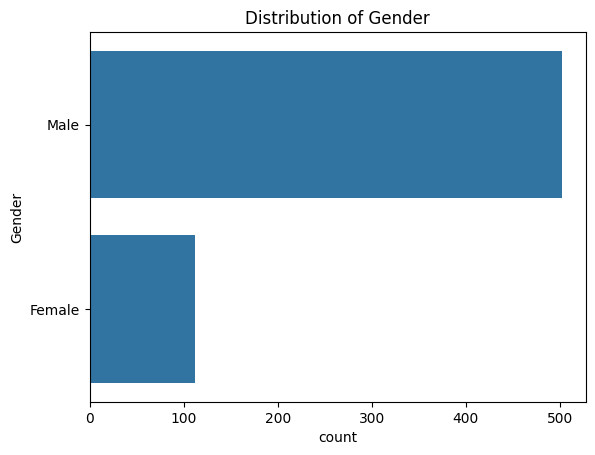

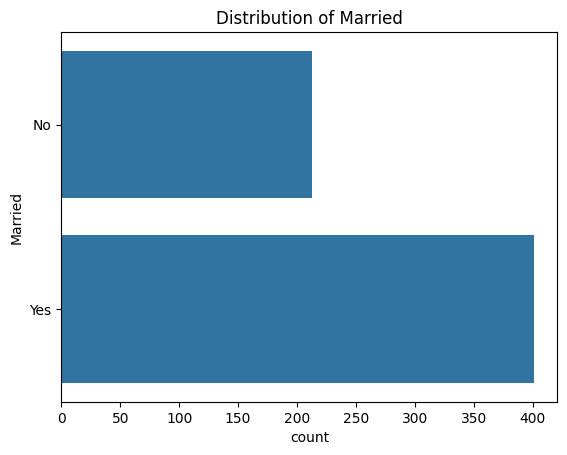

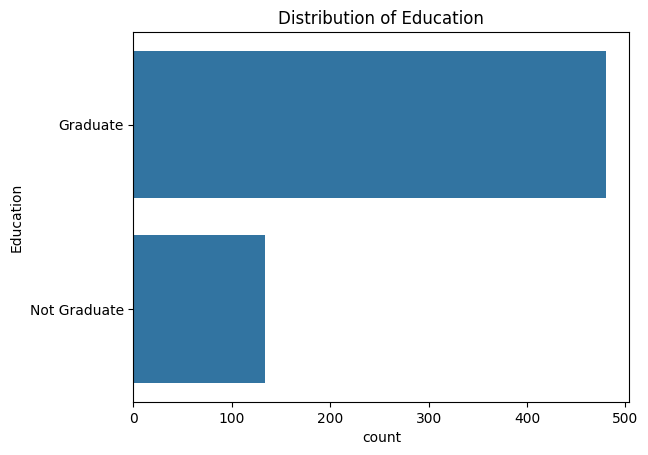

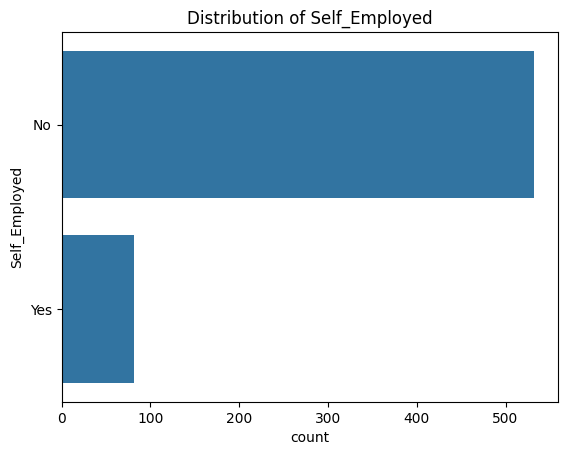

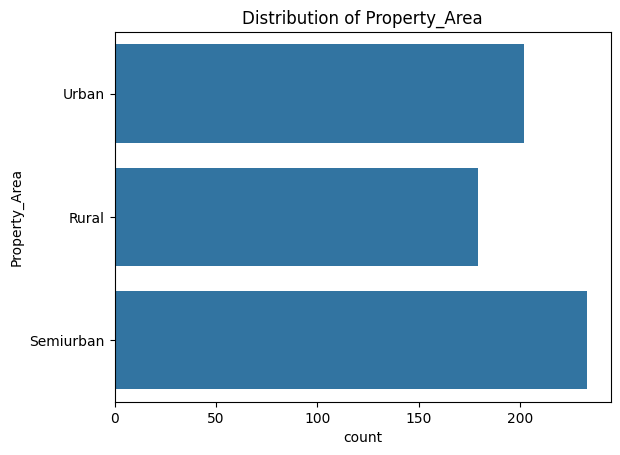

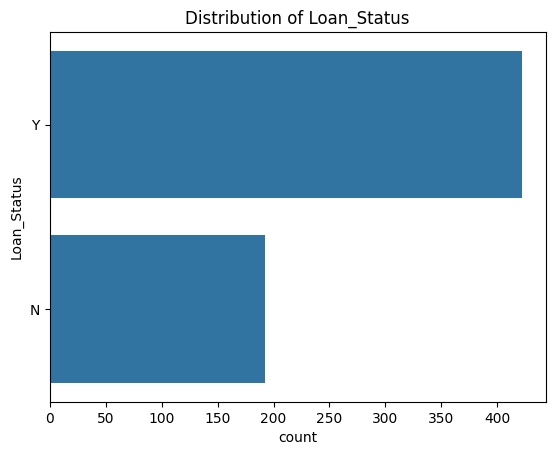

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of categorical variables

categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    sns.countplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.show()


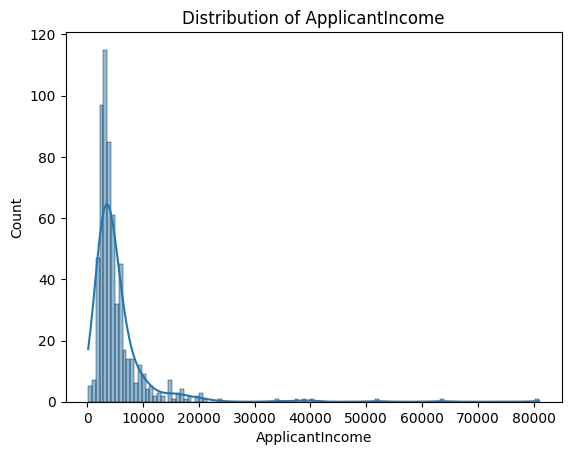

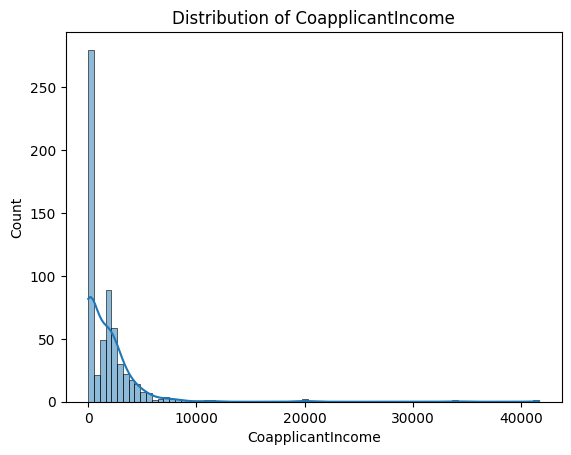

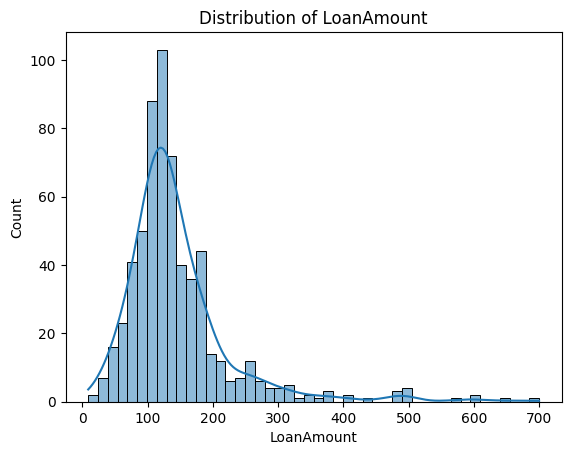

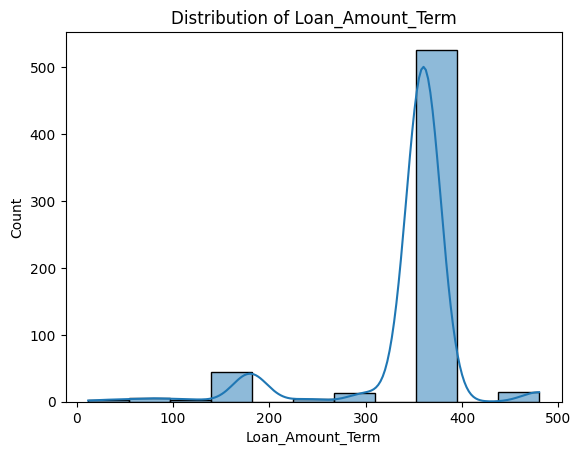

In [8]:
# Visualize the distribution of  Numerical variables

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

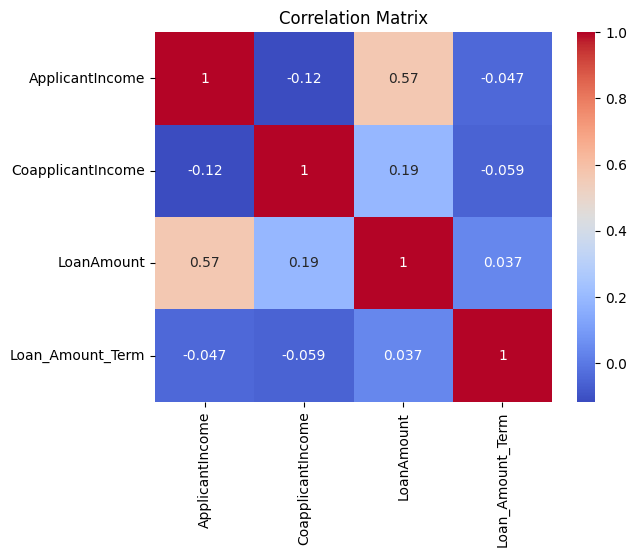

In [9]:
# Calculate and visualize the correlation matrix for numerical features

numerical_features = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


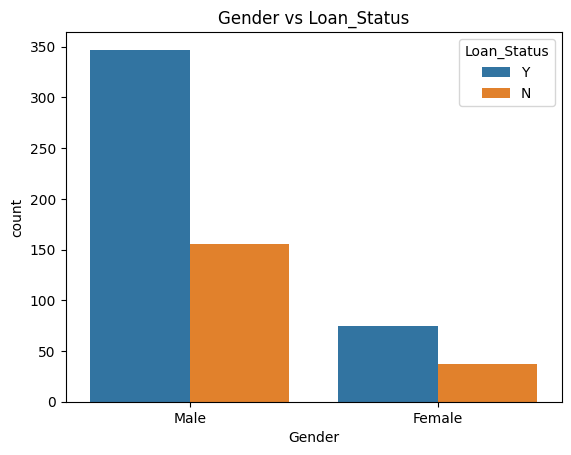

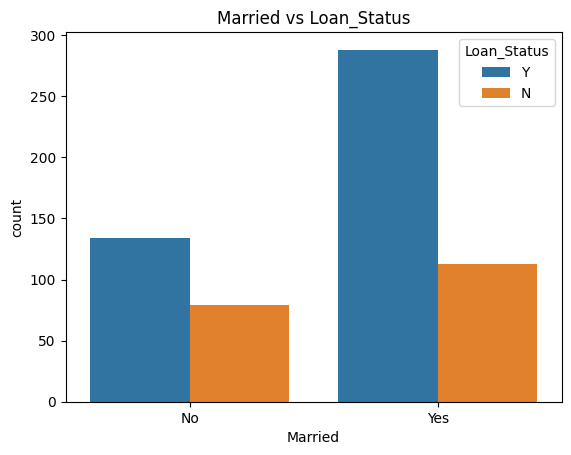

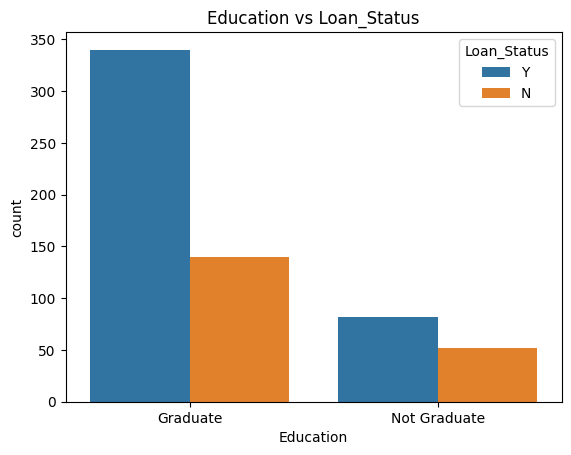

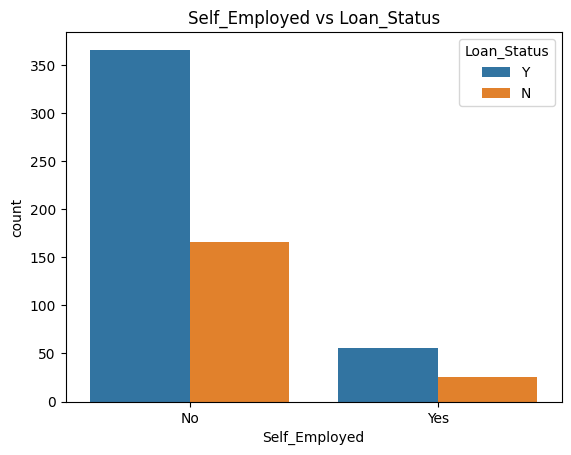

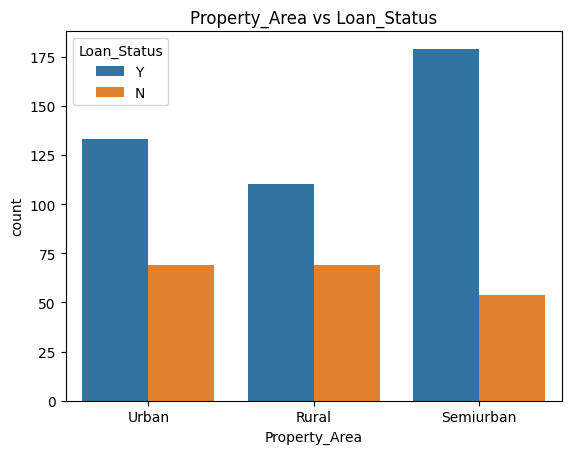

In [10]:
# categorical features and Loan_Status

for col in categorical_cols:
    if col != 'Loan_Status':
        sns.countplot(x=col, hue='Loan_Status', data=data)
        plt.title(f'{col} vs Loan_Status')
        plt.show()

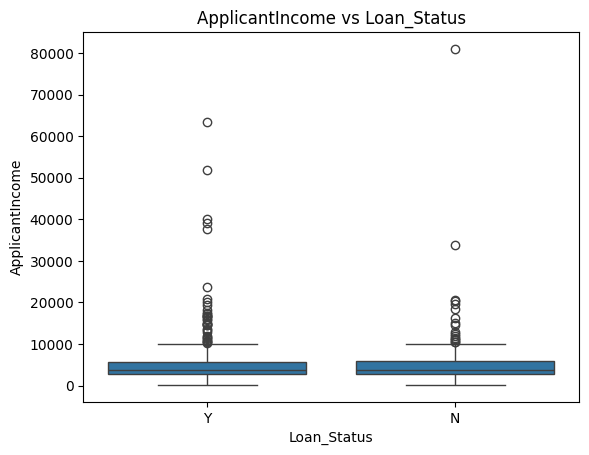

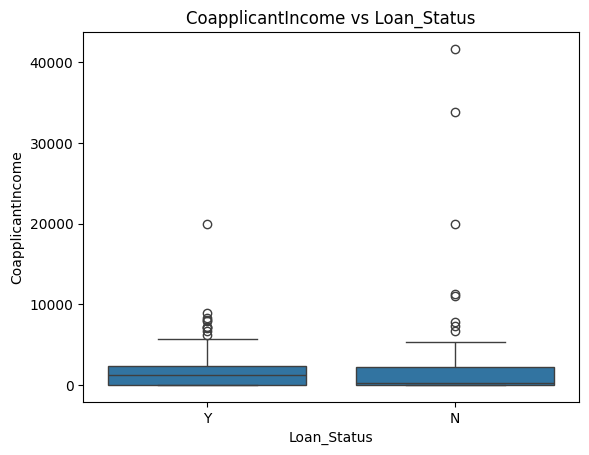

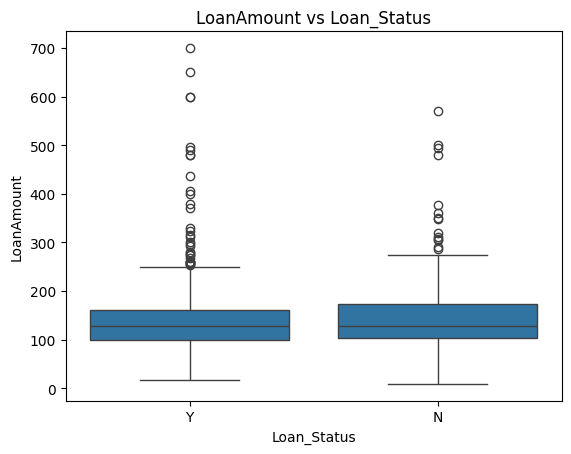

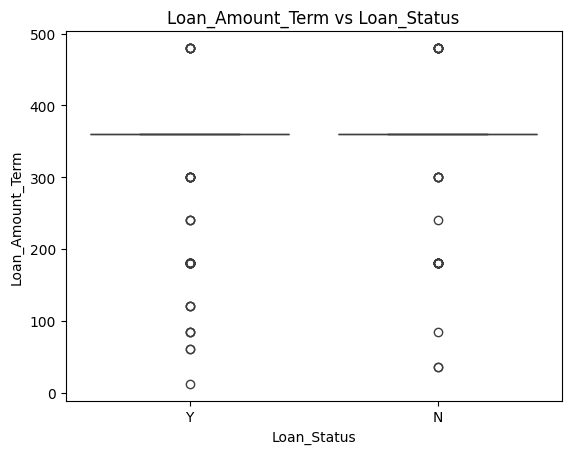

In [11]:
# Visualize the relationship between Numerical features vs. Loan_Status
for col in numerical_cols:
    sns.boxplot(x='Loan_Status', y=col, data=data)
    plt.title(f'{col} vs Loan_Status')
    plt.show()

*Feature Engineering*


In [12]:
# Creating impactful features that enhance model training by combining existing data into new, informative variables

data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['Income_to_LoanAmount_Ratio'] = data['Total_Income'] / data['LoanAmount']
data['Good_Credit_History'] = data['Credit_History'].apply(lambda x: 1 if x == 1 else 0)
area_impact = data.groupby('Property_Area')['LoanAmount'].mean().to_dict()
data['Property_Area_Impact'] = data['Property_Area'].map(area_impact)

print(data.head())

  Gender Married     Education Self_Employed  ApplicantIncome  \
0   Male      No      Graduate            No             5849   
1   Male     Yes      Graduate            No             4583   
2   Male     Yes      Graduate           Yes             3000   
3   Male     Yes  Not Graduate            No             2583   
4   Male      No      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  Total_Income  Income_to_LoanAmount_Ratio  \
0         Urban           Y        5849.0                   45.695312   
1         Rural           N        6091.0 

***Encoding Categorical Variables***

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Create a dictionary to store label encoders for each column
label_encoders = {}

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    # Create a new LabelEncoder instance for each column
    le = LabelEncoder()

    # Fit the label encoder and transform the data
    data[col] = le.fit_transform(data[col].astype(str))  # Ensure all values are treated as strings

    # Store the fitted encoder in the dictionary
    label_encoders[col] = le

# Display the transformed data
print(data.head())



   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       1        0          0              0             5849   
1       1        1          0              0             4583   
2       1        1          0              1             3000   
3       1        1          1              0             2583   
4       1        0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  Total_Income  Income_to_LoanAmount_Ratio  \
0              2            1        5849.0                   45.695312   
1              0            0        6

In [14]:
# Get descriptive statistics for the "LoanAmount" column and print them
x = data["LoanAmount"].describe()
print(x)


count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64


***Data Scaling***

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Identify numeric features to scale
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income','Income_to_LoanAmount_Ratio','Good_Credit_History','Property_Area_Impact']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the numeric features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Optional: Print the transformed data to verify scaling
print(data[numerical_features].describe())


       ApplicantIncome  CoapplicantIncome    LoanAmount  Loan_Amount_Term  \
count     6.140000e+02       6.140000e+02  6.140000e+02      6.140000e+02   
mean     -4.339634e-18       4.050325e-17 -2.603780e-17      5.930833e-17   
std       1.000815e+00       1.000815e+00  1.000815e+00      1.000815e+00   
min      -8.606493e-01      -5.544873e-01 -1.627255e+00     -5.132498e+00   
25%      -4.138159e-01      -5.544873e-01 -5.414462e-01      2.732313e-01   
50%      -2.606393e-01      -1.480047e-01 -2.112412e-01      2.732313e-01   
75%       6.414426e-02       2.312023e-01  2.260572e-01      2.732313e-01   
max       1.238462e+01       1.369617e+01  6.595146e+00      2.137276e+00   

       Total_Income  Income_to_LoanAmount_Ratio  Good_Credit_History  \
count  6.140000e+02                6.140000e+02         6.140000e+02   
mean   1.157236e-16               -1.301890e-16        -1.620130e-16   
std    1.000815e+00                1.000815e+00         1.000815e+00   
min   -8.650794e-0

***Training Loan Approval Prediction Model***



train the loan approval prediction model.

In [16]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Income_to_LoanAmount_Ratio,Good_Credit_History,Property_Area_Impact
0,1,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1,-0.182184,-0.145811,0.411733,-1.089882
1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0,-0.144684,-0.095634,0.411733,1.434423
2,1,1,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1,-0.623656,-0.152201,0.411733,-1.089882
3,1,1,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1,-0.322885,-0.265781,0.411733,-1.089882
4,1,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,1,-0.158785,-0.229204,0.411733,-1.089882


In [17]:
# Importing required machine learning models and utilities
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Splitting features and target variable
X = data.drop(columns="Loan_Status")

# Target variable: 'Loan_Status', which we want to predict
y = data["Loan_Status"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
# Find the maximum value in each column of the training dataset (X_train)
print(X_train.max())


Gender                         1.000000
Married                        1.000000
Education                      1.000000
Self_Employed                  1.000000
ApplicantIncome               12.384623
CoapplicantIncome             13.696173
LoanAmount                     6.595146
Loan_Amount_Term               2.137276
Credit_History                 1.000000
Property_Area                  2.000000
Total_Income                  11.462992
Income_to_LoanAmount_Ratio     9.161072
Good_Credit_History            0.411733
Property_Area_Impact           1.434423
dtype: float64


In [19]:
# Initialize a Logistic Regression model
model = LogisticRegression()

# Train the model using the training data (X_train and y_train)
model.fit(X_train, y_train)

# Predict the target variable (Loan_Status) on the test data (X_test)
y_pred = model.predict(X_test)


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels for the rows and columns
labels = ["0: Not Eligible for Loans", "1:Eligible for Loans"]

# Create a DataFrame for a more readable confusion matrix
confusion_df = pd.DataFrame(data=cm, index=labels, columns=labels)

# Display the confusion matrix
confusion_df

,0: Not Eligible for Loans,1:Eligible for Loans
0: Not Eligible for Loans,18,25
1:Eligible for Loans,2,78


In [21]:
# Get the intercept (bias term) of the trained Logistic Regression model
print(model.intercept_)


[1.41604492]


In [22]:
# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['0 = Not Eligible for Loans', '1 = Eligible for Loans']))

Classification Report:
                            precision    recall  f1-score   support

0 = Not Eligible for Loans       0.90      0.42      0.57        43
    1 = Eligible for Loans       0.76      0.97      0.85        80

                  accuracy                           0.78       123
                 macro avg       0.83      0.70      0.71       123
              weighted avg       0.81      0.78      0.75       123



In [24]:
# Importing RandomForestClassifier and evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize a Random Forest Classifier model with 100 trees (estimators) and a fixed random state for reproducibility
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model using the training data (X_train and y_train)
RF_model.fit(X_train, y_train)

# Predict the target variable (Loan_Status) on the test data (X_test)
RF_pred = RF_model.predict(X_test)

# Evaluate the model's performance by calculating accuracy
accuracy = accuracy_score(y_test, RF_pred)

# Print the accuracy score of the model
print("Accuracy:", accuracy)

Accuracy: 0.7723577235772358


In [25]:
# Generate and display the confusion matrix
RF_cm = confusion_matrix(y_test,RF_pred)
labels = ["0: Not Eligible for Loans", "1: Eligible for Loans"]
confusion_df = pd.DataFrame(data=RF_cm, index=labels, columns=labels)
print("Confusion Matrix:")
print(confusion_df)


Confusion Matrix:
                           0: Not Eligible for Loans  1: Eligible for Loans
0: Not Eligible for Loans                         21                     22
1: Eligible for Loans                              6                     74


In [26]:

# Generate and display the classification report
print("Classification Report:")
print(classification_report(y_test,RF_pred, target_names=labels))

Classification Report:
                           precision    recall  f1-score   support

0: Not Eligible for Loans       0.78      0.49      0.60        43
    1: Eligible for Loans       0.77      0.93      0.84        80

                 accuracy                           0.77       123
                macro avg       0.77      0.71      0.72       123
             weighted avg       0.77      0.77      0.76       123



In [27]:
# Importing Support Vector Classifier (SVC) from sklearn
svc = SVC(kernel='linear')

# Train the Support Vector Classifier model using the training data (X_train and y_train)
svc.fit(X_train, y_train)

# Predict the target variable (Loan_Status) on the test data (X_test)
svc_pred = svc.predict(X_test)

# Evaluate the model's performance by calculating accuracy
accuracy = accuracy_score(y_test, svc_pred)

# Print the accuracy score of the model
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid with correct case and list syntax
parameters = {'kernel': ['linear', 'rbf'], 'C': [90, 25, 0.1], 'gamma': [1, 2]}

# Initialize the SVM model
svm = SVC()

# Set up GridSearchCV with the SVM model and the parameter grid
clf = GridSearchCV(svm, parameters)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_opt = clf.predict(X_test)

# Calculate and print the accuracy of the optimized model
accuracy = accuracy_score(y_test, y_opt)
print("Accuracy:", accuracy)


Accuracy: 0.7886178861788617
